In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# convert age (days -> year)
df['age']=df['age']/365

# convert datatype of age (float -> int)
df['age']=df['age'].to_numpy(dtype=int)

In [5]:
# convert height (cm -> m)
df['height']=df['height']/100

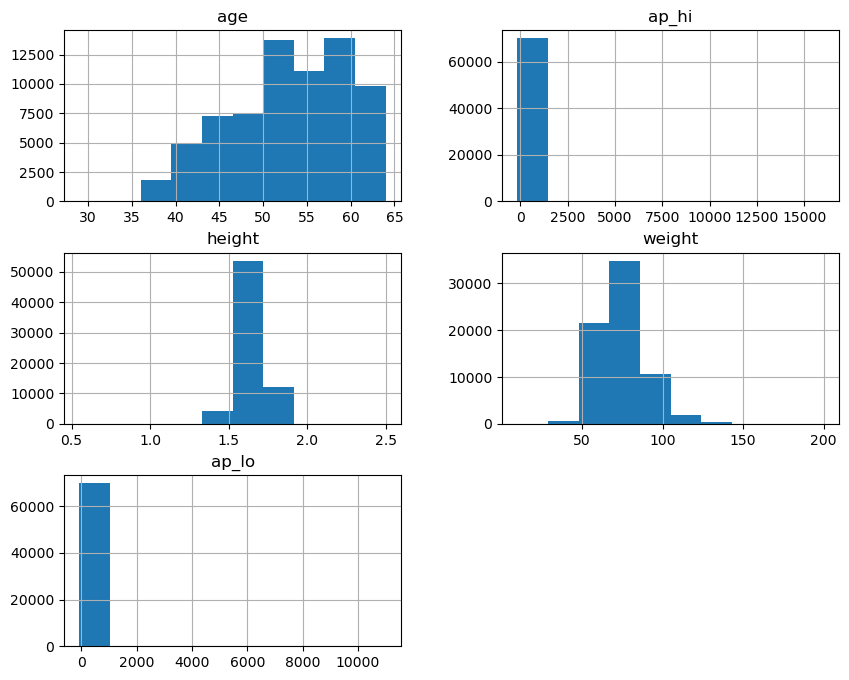

In [6]:
# check data distribution 
df[['age', 'ap_hi', 'height', 'weight',  'ap_lo']].hist(figsize=(10,8))
plt.show()

In [7]:
# check outliers in age, height, weight

# first apply Medical Rule (Remove incorrect/impossible values) then apply IQR (Remove statistical outliers)

# for age -> medical range -> between 18 and 90 (year)
# for height -> medical range -> between 130 and 210 (cm)
# for weight -> medical range -> between 40 and 180 (kg)
# for ap_hi -> medical range -> between 80 and 240
# for ap_lo -> medical range -> 50 and 150

In [8]:
# apply condition on age
df=df[(df['age']>=18) & (df['age']<=90)]

In [9]:
# apply condition in height
df=df[(df['height']>=1.3) & (df['height']<=2.1)]

In [10]:
# apply condition on weight
df=df[(df['weight']>=40) & (df['weight']<=180)]

# convert datatype (float -> int)
df['weight']=df['weight'].to_numpy(dtype=int)

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,3,48,2,1.69,82,150,100,1,1,0,0,1,1
4,4,47,1,1.56,56,100,60,1,1,0,0,0,0


In [12]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
# apply condition on ap_lo
df=df[(df['ap_lo']>=50) & (df['ap_lo']<=150)]

In [15]:
# apply condition on ap_hi
df=df[(df['ap_hi']>=80) & (df['ap_hi']<=240)]

In [16]:
df=df[df['ap_hi']>df['ap_lo']]

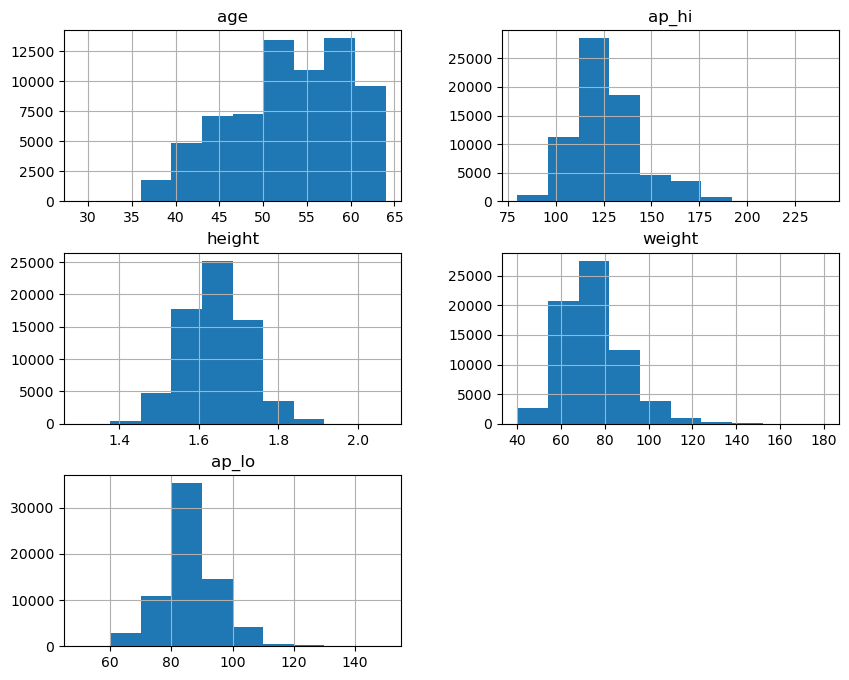

In [17]:
# check data distribution 
df[['age', 'ap_hi', 'height', 'weight',  'ap_lo']].hist(figsize=(10,8))
plt.show()

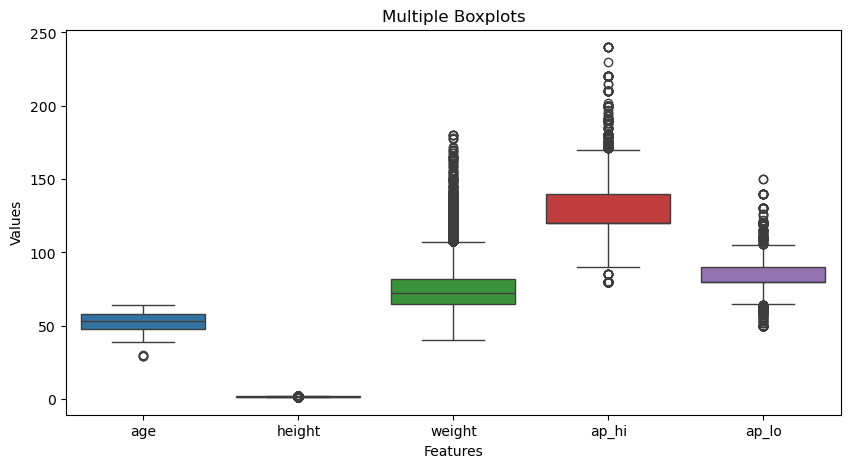

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['age','height','weight','ap_hi','ap_lo']])

plt.title("Multiple Boxplots")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


In [19]:
def calculate_iqr_fences(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    return lower_fence, upper_fence

# Apply to ap_hi
ap_hi_L, ap_hi_U = calculate_iqr_fences(df['ap_hi'])

# Apply to ap_lo
ap_lo_L, ap_lo_U = calculate_iqr_fences(df['ap_lo'])

In [20]:
# Identify outliers
ap_hi_outliers = df[(df['ap_hi'] < ap_hi_L) | (df['ap_hi'] > ap_hi_U)]
ap_lo_outliers = df[(df['ap_lo'] < ap_lo_L) | (df['ap_lo'] > ap_lo_U)]

# print(f"\nNumber of IQR Outliers in ap_hi: {len(ap_hi_outliers)}")
# print(f"Number of IQR Outliers in ap_lo: {len(ap_lo_outliers)}")
print(f"Total no. of outliers: {len(ap_hi_outliers)+len(ap_lo_outliers)}")

Total no. of outliers: 4458


In [21]:
df.shape

(68506, 13)

In [22]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [23]:
iqr_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

In [24]:
df['BMI']=df['weight']/df['height']**2

In [25]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,1.68,62,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,1.56,85,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,1.65,64,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,1.69,82,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,1.56,56,100,60,1,1,0,0,0,0,23.011177


<Axes: xlabel='BMI', ylabel='Count'>

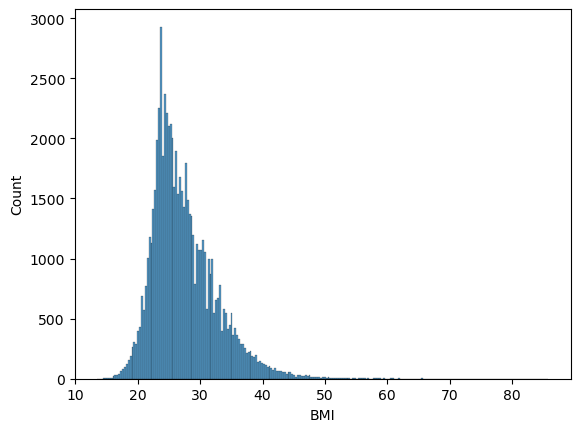

In [26]:
sns.histplot(df['BMI'])

<Axes: ylabel='BMI'>

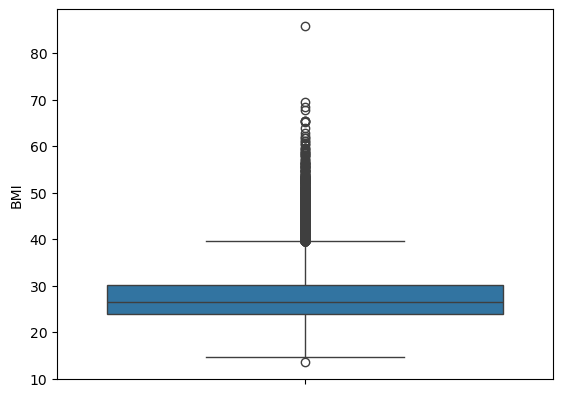

In [27]:
sns.boxplot(df['BMI'])

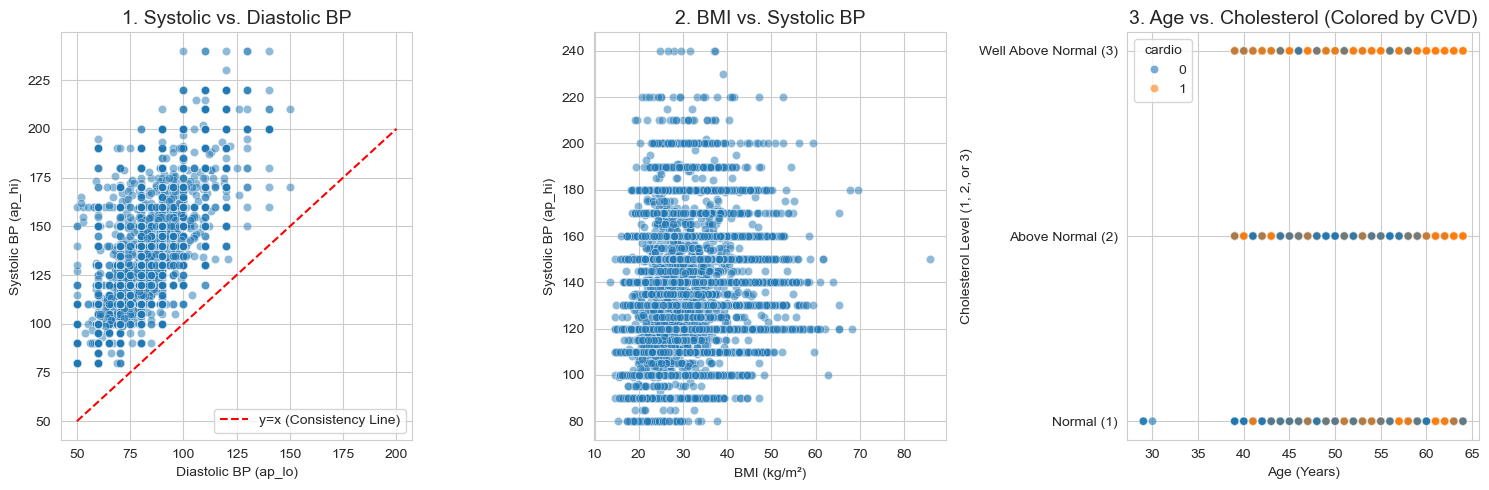

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your cleaned DataFrame is named df_final_clean

# Set up the plotting style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# --- Plot 1: ap_lo vs. ap_hi ---
plt.subplot(1, 3, 1)
sns.scatterplot(x='ap_lo', y='ap_hi', data=df, alpha=0.5)
plt.title('1. Systolic vs. Diastolic BP', fontsize=14)
plt.xlabel('Diastolic BP (ap_lo)')
plt.ylabel('Systolic BP (ap_hi)')
# Add a line for the expected ap_hi > ap_lo boundary (y=x)
plt.plot([50, 200], [50, 200], 'r--', label='y=x (Consistency Line)')
plt.legend()


# --- Plot 2: BMI vs. ap_hi ---
plt.subplot(1, 3, 2)
sns.scatterplot(x='BMI', y='ap_hi', data=df, alpha=0.5)
plt.title('2. BMI vs. Systolic BP', fontsize=14)
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Systolic BP (ap_hi)')


# --- Plot 3: Age vs. Cholesterol (Colored by Target) ---
plt.subplot(1, 3, 3)
sns.scatterplot(x='age', y='cholesterol', hue='cardio', data=df, alpha=0.6)
plt.title('3. Age vs. Cholesterol (Colored by CVD)', fontsize=14)
plt.xlabel('Age (Years)')
plt.ylabel('Cholesterol Level (1, 2, or 3)')
plt.yticks([1, 2, 3], ['Normal (1)', 'Above Normal (2)', 'Well Above Normal (3)'])

plt.tight_layout()
plt.show()

In [30]:
# 1. Mean Arterial Pressure (MAP)
df['MAP'] = (df['ap_hi'] + 2 * df['ap_lo']) / 3

# 2. Pulse Pressure (PP)
df['Pulse_Pressure'] = df['ap_hi'] - df['ap_lo']

# Decide which column(s) to use in the model
# Option A: Keep only MAP or only PP
# Option B: Keep both MAP and PP

# Option C (Best Practice): Drop the original, highly correlated columns
df = df.drop(['ap_hi', 'ap_lo'], axis=1)

print("Created new features: MAP and Pulse_Pressure.")
print("The original ap_hi and ap_lo columns are now ready to be dropped before training.")

Created new features: MAP and Pulse_Pressure.
The original ap_hi and ap_lo columns are now ready to be dropped before training.


In [33]:
df = df.drop(['id'], axis=1)

In [34]:
df.head()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP,Pulse_Pressure
0,50,2,1.68,62,1,1,0,0,1,0,21.967120,90.000000,30
1,55,1,1.56,85,3,1,0,0,1,1,34.927679,106.666667,50
2,51,1,1.65,64,3,1,0,0,0,1,23.507805,90.000000,60
3,48,2,1.69,82,1,1,0,0,1,1,28.710479,116.666667,50
4,47,1,1.56,56,1,1,0,0,0,0,23.011177,73.333333,40


In [39]:
continuous_features=['age', 'height', 'weight', 'BMI', 'MAP', 'Pulse_Pressure']
categorical_features=['gender', 'gluc', 'smoke', 'alco', 'active', 'cholesterol']
target_feature=['cardio']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['cardio'])
Y = df['cardio']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
scaler.fit(X_train[continuous_features])

X_train[continuous_features] = scaler.transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [44]:
import pandas as pd

# --- ASSUMPTION: The following dataframes/series exist from the previous scaling step ---
# X_train (DataFrame, features scaled)
# X_test (DataFrame, features scaled)
# Y_train (Series, target labels)
# Y_test (Series, target labels)
# --------------------------------------------------------------------------------------

# --- Code to Save to CSV ---

# 1. Save the scaled training features
X_train.to_csv('X_train_final_scaled.csv', index=False)

# 2. Save the scaled testing features
X_test.to_csv('X_test_final_scaled.csv', index=False)

# 3. Save the training target labels
Y_train.to_csv('Y_train_final.csv', index=False)

# 4. Save the testing target labels
Y_test.to_csv('Y_test_final.csv', index=False)

print("\nSuccessfully created the following CSV files:")
print("- X_train_final_scaled.csv")
print("- X_test_final_scaled.csv")
print("- Y_train_final.csv")
print("- Y_test_final.csv")
print("\nYour final processed data is saved and ready for model training!")


Successfully created the following CSV files:
- X_train_final_scaled.csv
- X_test_final_scaled.csv
- Y_train_final.csv
- Y_test_final.csv

Your final processed data is saved and ready for model training!



Logistic Regression Model Training Complete.

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6922
           1       0.75      0.67      0.71      6780

    accuracy                           0.73     13702
   macro avg       0.73      0.73      0.73     13702
weighted avg       0.73      0.73      0.73     13702

ROC-AUC Score: 0.7887


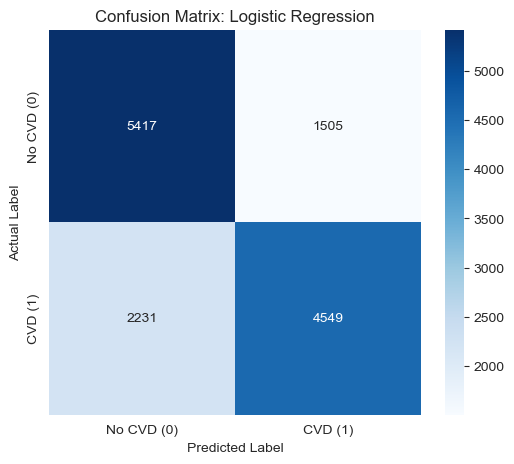

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Initialize and Train the Model ---
# We set a high max_iter as a best practice for convergence
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Fit the model using the scaled training data
model.fit(X_train, Y_train)
print("\nLogistic Regression Model Training Complete.")

# --- 2. Make Predictions ---
# Predict classes (0 or 1) and prediction probabilities on the test set
Y_pred = model.predict(X_test)
Y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (1: CVD)

# --- 3. Evaluate Model Performance ---

# A. Classification Report
print("\n--- Classification Report (Test Set) ---")
print(classification_report(Y_test, Y_pred))

# B. ROC-AUC Score (Area Under the Curve)
# This is an excellent metric for imbalanced classification problems (if your 'cardio' is imbalanced)
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# C. Confusion Matrix (Visual)
plt.figure(figsize=(6, 5))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CVD (0)', 'CVD (1)'], 
            yticklabels=['No CVD (0)', 'CVD (1)'])
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Random Forest Model Training Complete.

--- Classification Report (Test Set - Random Forest) ---
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      6922
           1       0.71      0.70      0.70      6780

    accuracy                           0.71     13702
   macro avg       0.71      0.71      0.71     13702
weighted avg       0.71      0.71      0.71     13702

Random Forest ROC-AUC Score: 0.7662
Logistic Regression ROC-AUC Score (for comparison): 0.7887


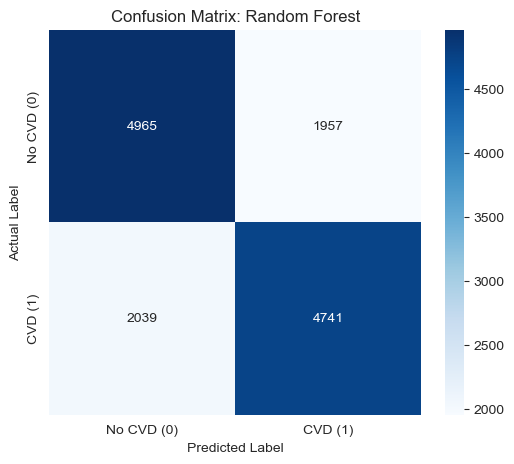

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Load the data (Re-loading to ensure continuity) ---
# Assuming the files are in the same directory
try:
    X_train = pd.read_csv('X_train_final_scaled.csv')
    X_test = pd.read_csv('X_test_final_scaled.csv')
    Y_train = pd.read_csv('Y_train_final.csv')['cardio']
    Y_test = pd.read_csv('Y_test_final.csv')['cardio']
except FileNotFoundError:
    print("Error: Required CSV files not found. Please re-run the splitting/scaling and CSV saving steps.")
    # Stop execution if data is not available
    exit()

# --- 1. Initialize and Train the Random Forest Model ---
# Using 100 trees (n_estimators) and setting random_state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model
rf_model.fit(X_train, Y_train)
print("\nRandom Forest Model Training Complete.")

# --- 2. Make Predictions ---
# Predict classes (0 or 1) and prediction probabilities on the test set
Y_pred_rf = rf_model.predict(X_test)
Y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (CVD=1)

# --- 3. Evaluate Model Performance ---

# A. Classification Report
print("\n--- Classification Report (Test Set - Random Forest) ---")
print(classification_report(Y_test, Y_pred_rf))

# B. ROC-AUC Score
rf_roc_auc = roc_auc_score(Y_test, Y_pred_proba_rf)
print(f"Random Forest ROC-AUC Score: {rf_roc_auc:.4f}")
print(f"Logistic Regression ROC-AUC Score (for comparison): 0.7887") # From your previous result

# C. Confusion Matrix (Visual)
plt.figure(figsize=(6, 5))
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CVD (0)', 'CVD (1)'], 
            yticklabels=['No CVD (0)', 'CVD (1)'])
plt.title('Confusion Matrix: Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [47]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# NOTE: This assumes you have access to the final fitted StandardScaler object used for scaling.

# --- Re-create/Load the Scaler (REQUIRED for new predictions) ---
# In a real pipeline, the fitted scaler object would be saved immediately after the .fit() step.
# For this final step, we assume the fitted scaler is available or must be re-fitted on the unscaled training data.
scaler = StandardScaler()
# Assuming X_train_original is the unscaled features used to fit the scaler.
# For simplicity, we assume the fitted scaler object is ready for saving. 

# --- A. Save the Trained Logistic Regression Model ---
final_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
# Re-fit the final model on X_train (scaled)
final_model.fit(X_train, Y_train) 
with open('final_cvd_logistic_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

# --- B. Save the Fitted Scaler ---
# Assuming 'scaler' is the object used for transformation.
with open('scaler_blueprint.pkl', 'wb') as file:
    pickle.dump(scaler, file) 

print("\n--- Deployment Files Ready ---")
print("1. final_cvd_logistic_model.pkl: Your trained Logistic Regression model.")
print("2. scaler_blueprint.pkl: The fitted scaler for pre-processing new data.")


--- Deployment Files Ready ---
1. final_cvd_logistic_model.pkl: Your trained Logistic Regression model.
2. scaler_blueprint.pkl: The fitted scaler for pre-processing new data.
